In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import numpy as np

2024-05-10 05:29:39.028855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 05:29:39.028949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 05:29:39.195423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Read Dataset**

In [2]:
train_path = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_path = "/kaggle/input/intel-image-classification/seg_test/seg_test"

In [3]:
image_classes = os.listdir("/kaggle/input/intel-image-classification/seg_test/seg_test")
image_classes

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

# **Data Visualization**

In [4]:
def plot_images(image_classes):
    plt.figure(figsize = (14, 14))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + "/" + category
        image_in_folder = os.listdir(image_path)
        
        first_image = image_in_folder[0]
        first_image_path = image_path + "/" + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis("off")
    plt.show()

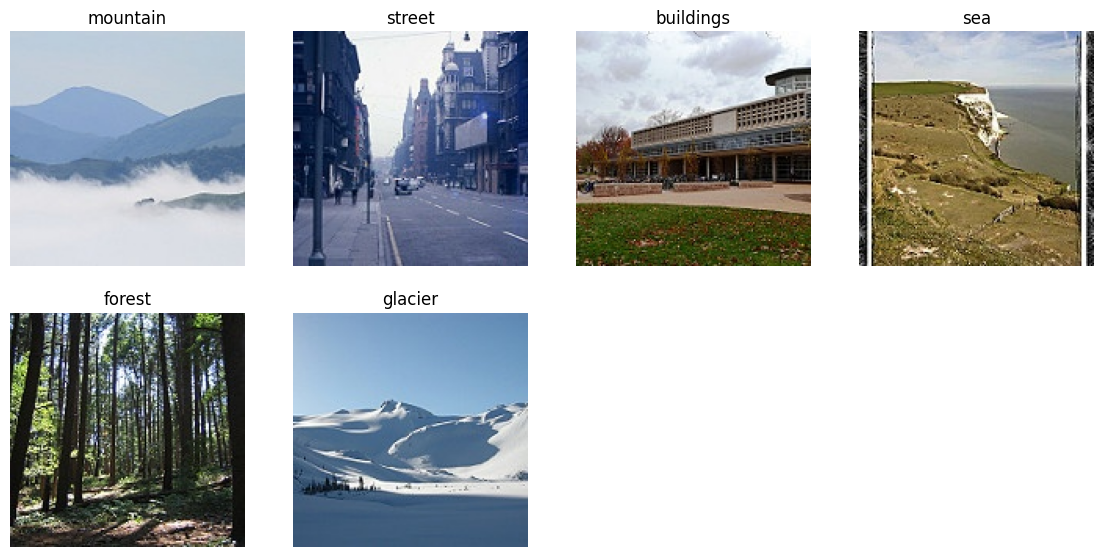

In [5]:
plot_images(image_classes)

# **Data Preprocessing**

In [6]:
image_generator = ImageDataGenerator(rescale = 1/255)

In [7]:
train_data = image_generator.flow_from_directory(train_path,
                                                batch_size = 128,
                                                target_size = (150, 150),
                                                class_mode = "categorical")

Found 14034 images belonging to 6 classes.


In [8]:
test_data = image_generator.flow_from_directory(test_path,
                                                batch_size = 1,
                                                target_size = (150, 150),
                                                class_mode = "categorical")

Found 3000 images belonging to 6 classes.


# **CNN Model Building**

In [9]:
model = Sequential()

In [10]:
# Add Input & Hidden Layers

# Convolutional Layer
model.add(Conv2D(filters = 32,
                kernel_size = 3,
                padding = "same",
                activation = "relu",
                input_shape = (150, 150, 3)))

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional Layer
model.add(Conv2D(filters = 64, 
                 kernel_size = 3, 
                 padding = "same", 
                 activation = "relu",)
         )

# Pooling Layer
model.add(MaxPooling2D())

# Convolutional Layer
model.add(Conv2D(filters = 128, 
                 kernel_size = 3, 
                 padding = "same", 
                 activation = "relu",)
         )

# Pooling Layer
model.add(MaxPooling2D())


# CLASSIFICATION

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))

# Output Layer
model.add(Dense(6, activation = "softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# **Model Summary**

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,419,078 (20.67 MB)

 Trainable params: 5,419,078 (20.67 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Compiling & Fitting**

In [12]:
model.compile(optimizer = "adam", 
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [13]:
model_history = model.fit(train_data, 
                         epochs = 5,
                         validation_data = test_data )
# We Can use the Test Data as the Validation Data

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/110 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.1680 - loss: 1.9902  

I0000 00:00:1715319033.473466     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715319033.492009     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  5/110 ━━━━━━━━━━━━━━━━━━━━ 4:18 2s/step - accuracy: 0.1883 - loss: 2.0301

W0000 00:00:1715319043.226644     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 119s 896ms/step - accuracy: 0.4695 - loss: 1.3695 - val_accuracy: 0.6933 - val_loss: 0.8181
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 269ms/step - accuracy: 0.7258 - loss: 0.7513 - val_accuracy: 0.7550 - val_loss: 0.6551
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 268ms/step - accuracy: 0.7942 - loss: 0.5635 - val_accuracy: 0.7933 - val_loss: 0.5637
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 268ms/step - accuracy: 0.8371 - loss: 0.4566 - val_accuracy: 0.8110 - val_loss: 0.5172
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 267ms/step - accuracy: 0.8774 - loss: 0.3502 - val_accuracy: 0.8093 - val_loss: 0.5738


# **Model Visulization**

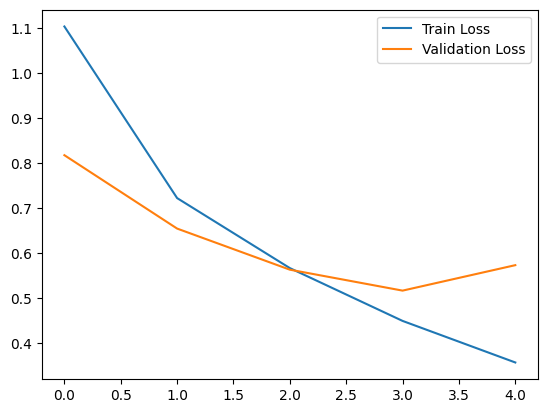

In [14]:
plt.plot(model_history.history["loss"], label = "Train Loss")
plt.plot(model_history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

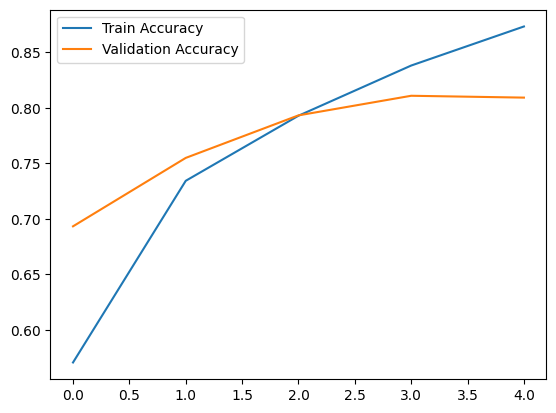

In [15]:
plt.plot(model_history.history["accuracy"], label = "Train Accuracy")
plt.plot(model_history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

# **Model Evaluation**

In [16]:
model.evaluate(train_data)

  1/110 ━━━━━━━━━━━━━━━━━━━━ 1:17 711ms/step - accuracy: 0.9141 - loss: 0.2279

W0000 00:00:1715319256.673659     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 25s 219ms/step - accuracy: 0.9047 - loss: 0.2787


W0000 00:00:1715319280.494040     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.2815176844596863, 0.9053013920783997]

In [17]:
model.evaluate(test_data)

3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8035 - loss: 0.5999


[0.5737665295600891, 0.809333324432373]

# **Predict New Image**

In [18]:
testing_image = "/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20204.jpg"

In [19]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())
class_map

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [20]:
def prediction(testing_image, actual_label):
    
    # Load & Preprocess the Image
    test_img = image.load_img(testing_image, target_size = (150,150))
    test_img_arr = image.img_to_array(test_img) / 255
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0],
                                          test_img_arr.shape[1],
                                          test_img_arr.shape[2]))
    
    # Make Prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_class]
    
    # Visulize the Image
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("Acutal Label : {}, Predicted Label : {}".format(actual_label, 
                                                              predicted_img))
    plt.grid()
    plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


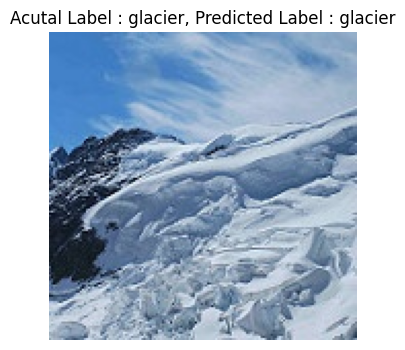

In [21]:
prediction(testing_image, actual_label = "glacier")

# **Saving the Model**

In [22]:
model.save("Intel_images_model.h5")

# **Loading the Model**

In [23]:
from tensorflow.keras.models import load_model
model = load_model("Intel_images_model.h5")